In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df=pd.read_csv('train.csv')

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

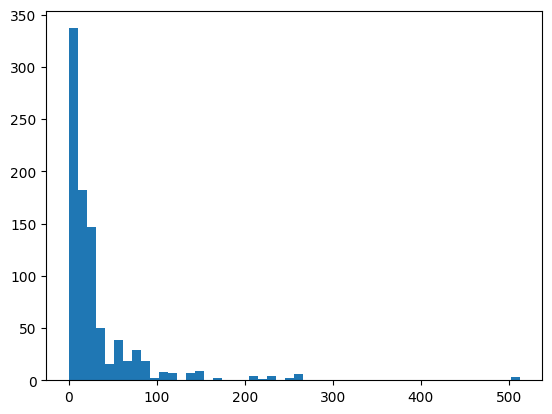

In [4]:
plt.hist(df['Fare'],bins=50)

plt.show()

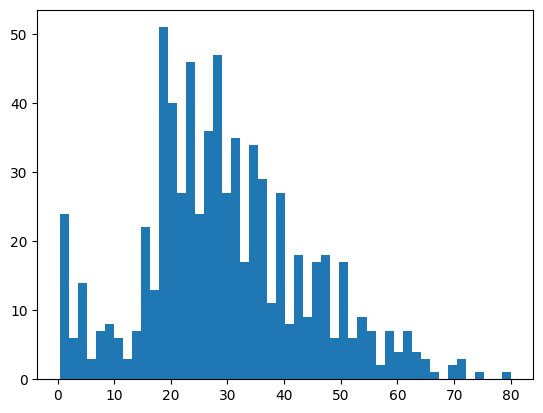

In [5]:
plt.hist(df['Age'],bins=50)
plt.show()

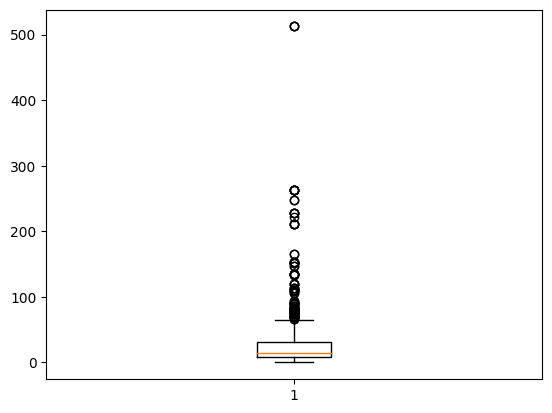

In [6]:
plt.boxplot(df['Fare'])
plt.show()

In [7]:
df['Age']=df['Age'].fillna(df['Age'].mean())

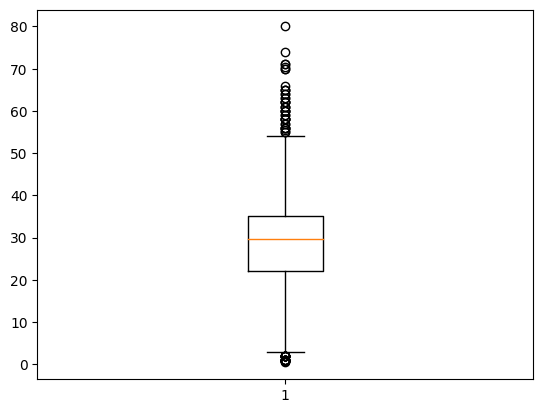

In [8]:
plt.boxplot(df['Age'])
plt.show()

C:\Users\babam\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


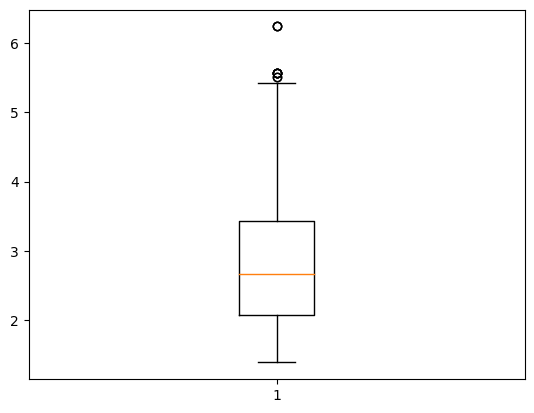

In [9]:
plt.boxplot(np.log(df['Fare']))
plt.show()

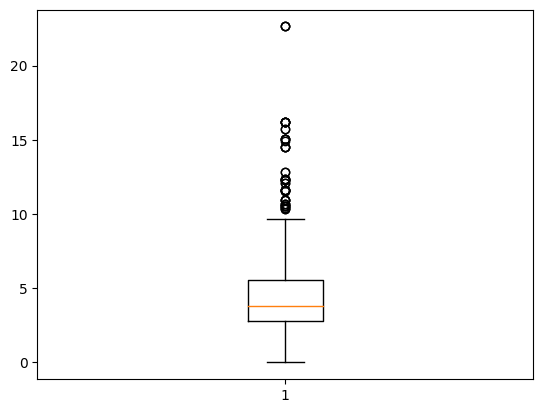

In [10]:
plt.boxplot(np.sqrt(df['Fare']))
plt.show()

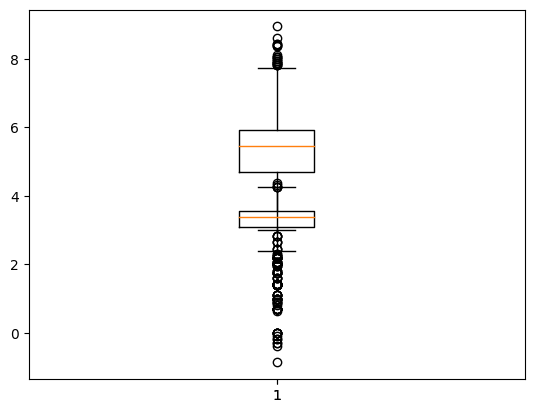

In [11]:
plt.boxplot(np.log(df['Age']))
plt.boxplot(np.sqrt(df['Age']))
plt.show()

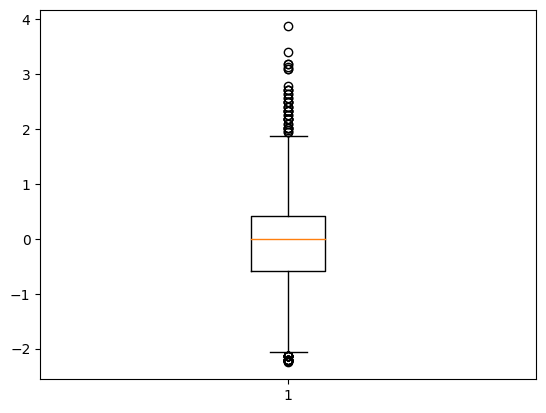

In [12]:
plt.boxplot((df['Age']-df['Age'].mean())/df['Age'].std())
plt.show()

In [13]:
df['Age'].mean()+3*df['Age'].std()

68.70516332506747

In [14]:
df[df['Age']>68]['Age']=68

C:\Users\babam\AppData\Local\Temp\ipykernel_21752\4130981210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Age']>68]['Age']=68


In [15]:
df['Age'].max()

80.0

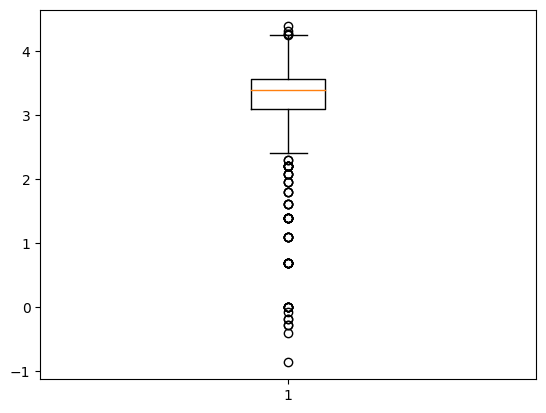

In [16]:
plt.boxplot(np.log(df['Age']))
plt.show()

In [17]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1c65a60ef90>,
 'caps': [<matplotlib.lines.Line2D at 0x1c65a60ca90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c65a5dbf10>],
 'medians': [<matplotlib.lines.Line2D at 0x1c65a5d1ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c65a5d8790>],
 'means': []}

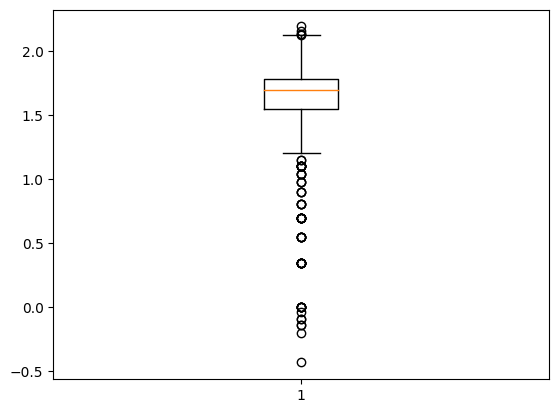

In [18]:
plt.boxplot(np.log(np.sqrt(df['Age'])))

C:\Users\babam\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


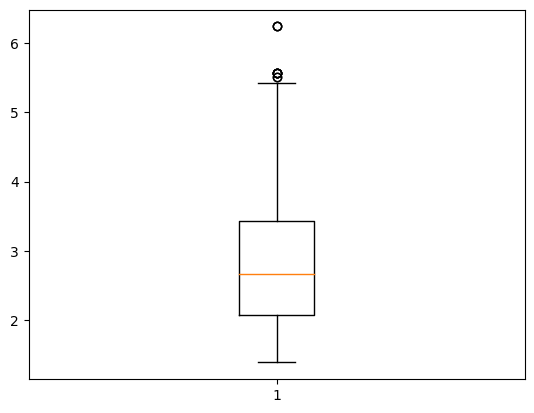

In [19]:
plt.boxplot(np.log(df['Fare']))
plt.show()

In [20]:
df[np.log(df['Fare'])>5.6]

C:\Users\babam\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [21]:
ds=pd.get_dummies(df,columns=["Embarked","Pclass"])

In [22]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
ds['Sex']=lbl.fit_transform(ds['Sex'])

In [23]:
ds

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,0,0,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0,0,1,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1,0,0,1,0,0


In [24]:
len(df['Cabin'].unique())

148

In [25]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass'>

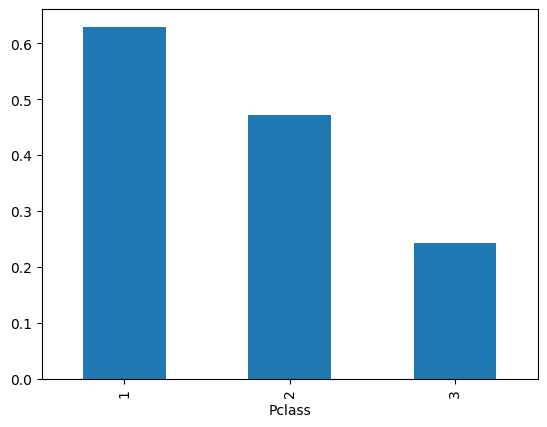

In [26]:
df.groupby('Pclass')['Survived'].apply(lambda X : X.sum()/X.count()).plot.bar()


<Axes: xlabel='Embarked'>

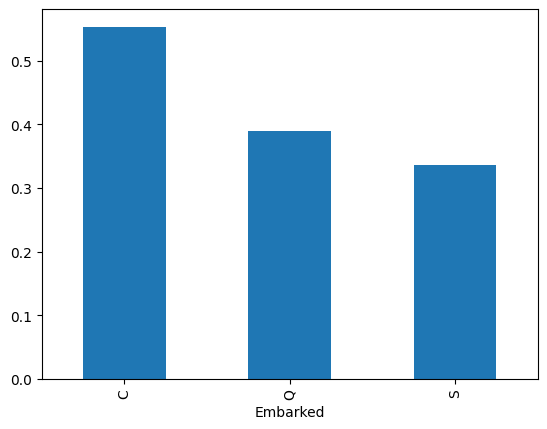

In [27]:
df.groupby('Embarked')['Survived'].apply(lambda X : X.sum()/X.count()).plot.bar()

In [28]:
ds['Age']=np.log(ds['Age'])

In [29]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [30]:
scal=StandardScaler()

In [31]:
scal

StandardScaler()

In [32]:
ds['Fare']=scal.fit_transform(ds[['Fare']])

In [33]:
ds

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,3.091042,1,0,A/5 21171,-0.502445,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.637586,1,0,PC 17599,0.786845,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,3.258097,0,0,STON/O2. 3101282,-0.488854,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3.555348,1,0,113803,0.420730,C123,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",1,3.555348,0,0,373450,-0.486337,NaN,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",1,3.295837,0,0,211536,-0.386671,NaN,0,0,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",0,2.944439,0,0,112053,-0.044381,B42,0,0,1,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,3.391117,1,2,W./C. 6607,-0.176263,NaN,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",1,3.258097,0,0,111369,-0.044381,C148,1,0,0,1,0,0


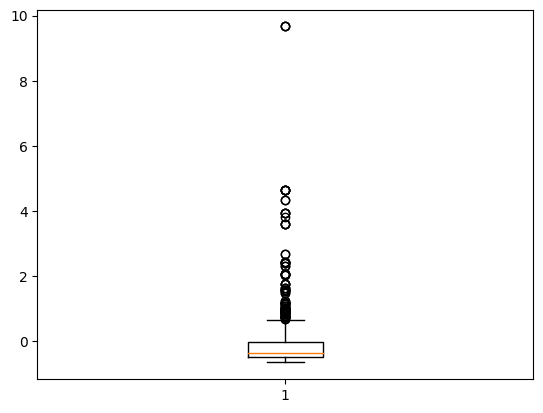

In [34]:
plt.boxplot(ds['Fare'])
plt.show()

In [35]:
ds.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [36]:
X=ds.drop('Survived',axis=1)
y=ds['Survived']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score,classification_report

In [40]:
model=LogisticRegression()
model.fit(X_train,y_train,)

LogisticRegression()

In [41]:
ypred=model.predict(X_test)

In [42]:
# ypred

In [43]:
model.score(X_test,y_test)

0.823728813559322

In [44]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       175
           1       0.81      0.73      0.77       120

    accuracy                           0.82       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



In [45]:
accuracy_score(y_test,ypred)

0.823728813559322

In [46]:
# from sklearn.svm import SVC
# model=SVC()
# model.fit(X_train,y_train,)
# ypred=model.predict(X_test)
# model.score(X_test,y_test)
# accuracy_score(y_test,ypred)

In [47]:
model.intercept_

array([3.94002025])

In [48]:
# X_train_scaled=(X_train-X_train.mean())/X_train.std()

In [49]:
# X_test_scaled=(X_test-X_train.mean())/X_train.std()

In [50]:
# X_test_scaled

In [51]:
# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression()
# model.fit(X_train_scaled,y_train,)
# ypred=model.predict(X_test_scaled)
# model.score(X_test_scaled,y_test)
# accuracy_score(y_test,ypred)

In [52]:
X_test

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
709,1,3.391117,1,1,-0.341452,1,0,0,0,0,1
439,1,3.433987,0,0,-0.437007,0,0,1,0,1,0
840,1,2.995732,0,0,-0.488854,0,0,1,0,0,1
720,0,1.791759,0,1,0.016023,0,0,1,0,1,0
39,0,2.639057,1,0,-0.422074,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
715,1,2.944439,0,0,-0.494391,0,0,1,0,0,1
525,1,3.701302,0,0,-0.492378,0,1,0,0,0,1
381,0,0.000000,0,2,-0.331467,1,0,0,0,0,1
140,0,3.391117,0,2,-0.341452,1,0,0,0,0,1


In [53]:
X.corr()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
Sex,1.000000,0.074843,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722,-0.098013,-0.064746,0.137143
Age,0.074843,1.000000,-0.290636,-0.287697,0.047328,0.009427,0.022598,-0.027023,0.227408,-0.025520,-0.175166
SibSp,-0.114631,-0.290636,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,-0.054582,-0.055932,0.092548
Parch,-0.245489,-0.287697,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,-0.017633,-0.000734,0.015790
Fare,-0.182333,0.047328,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,0.591711,-0.118557,-0.413333
Embarked_C,-0.082853,0.009427,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,0.296423,-0.125416,-0.153329
Embarked_Q,-0.074115,0.022598,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,-0.155342,-0.127301,0.237449
Embarked_S,0.125722,-0.027023,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,-0.170379,0.192061,-0.009511
Pclass_1,-0.098013,0.227408,-0.054582,-0.017633,0.591711,0.296423,-0.155342,-0.170379,1.000000,-0.288585,-0.626738
Pclass_2,-0.064746,-0.025520,-0.055932,-0.000734,-0.118557,-0.125416,-0.127301,0.192061,-0.288585,1.000000,-0.565210


In [54]:
X_train['Age']

6      3.988984
718    3.391117
685    3.218876
73     3.258097
882    3.091042
         ...   
106    3.044522
270    3.391117
860    3.713572
435    2.639057
102    3.044522
Name: Age, Length: 596, dtype: float64

In [55]:
X_train['Age']=(X_train['Age']-X_train['Age'].mean())/X_train['Age'].std()
X_test['Age']=(X_test['Age']-X_train['Age'].mean())/X_train['Age'].std()
X_train['Fare']=(X_train['Fare']-X_train['Fare'].mean())/X_train['Fare'].std()
X_test['Fare']=(X_test['Fare']-X_train['Fare'].mean())/X_train['Fare'].std()


In [56]:
X_train

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
6,1,1.057969,0,0,0.387516,0,0,1,1,0,0
718,1,0.229367,0,0,-0.318813,0,1,0,0,0,1
685,1,-0.009348,1,2,0.187767,1,0,0,0,1,0
73,1,0.045009,1,0,-0.339127,1,0,0,0,0,1
882,0,-0.186517,0,0,-0.415612,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,0,-0.250990,0,0,-0.471296,0,0,1,0,0,1
270,1,0.229367,0,0,-0.017731,0,0,1,1,0,0
860,1,0.676267,2,0,-0.345846,0,0,1,0,0,1
435,0,-0.812938,1,2,1.711064,0,0,1,1,0,0


In [57]:
df[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.091566
Fare,0.091566,1.000000


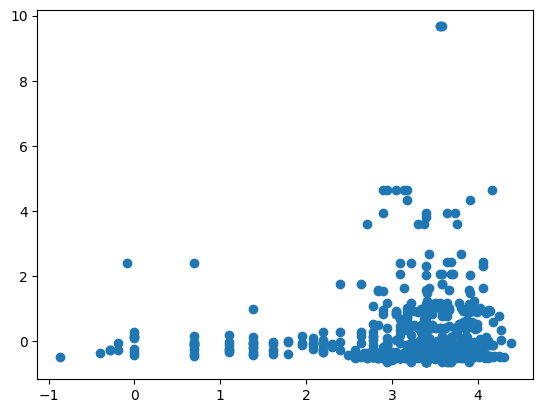

In [58]:
plt.scatter(ds['Age'], ds['Fare'])

In [59]:
X_train['Age'] = X_train['Age'] - X_train['Age'].mean()

In [60]:
g1 = df[df['Survived']==1]['Age']
g2 = df[df['Survived']==0]['Age']
t_stat, pvol = stats.ttest_ind(g1,g2)
t_stat 

-2.0865081090373168

In [61]:
pvol

0.03721708372685034

(array([[ 15.,   5.,  11.,   2.,   3.,   2.,   1.,   3.,   3.,  10.,   6.,
          18.,   8.,  11.,  20.,   6.,  17.,  15.,  62.,  17.,   7.,  17.,
          12.,   5.,  11.,   2.,   7.,   3.,   5.,   7.,   4.,   7.,   3.,
           4.,   3.,   0.,   3.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   1.],
        [  9.,   1.,   3.,   1.,   4.,   6.,   5.,   0.,   4.,  12.,   7.,
          33.,  32.,  16.,  26.,  18.,  19.,  32., 142.,  18.,  10.,  17.,
          17.,   6.,  16.,   6.,  11.,   6.,  12.,  11.,   2.,  10.,   3.,
           5.,   4.,   2.,   4.,   2.,   5.,   2.,   3.,   1.,   0.,   2.,
           3.,   0.,   1.,   0.,   0.,   0.]]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.57

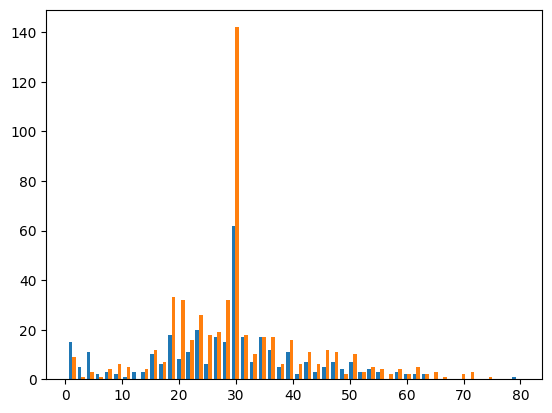

In [62]:
plt.hist((g1,g2), bins=50)

In [63]:
g3 = df[df['Survived']==1]['Fare']
g4 = df[df['Survived']==0]['Fare']
t_stat, pvol = stats.ttest_ind(g1,g2)
t_stat 

-2.0865081090373168

In [64]:
pvol

0.03721708372685034

(array([[ 67.,  77.,  67.,  18.,   4.,  27.,   8.,  18.,  15.,   2.,   5.,
           6.,   0.,   6.,   6.,   0.,   2.,   0.,   0.,   0.,   3.,   0.,
           3.,   0.,   1.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   3.],
        [270., 105.,  80.,  32.,  12.,  12.,  10.,  11.,   3.,   0.,   3.,
           1.,   0.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
           1.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0.      ,  10.246584,  20.493168,  30.739752,  40.986336,
         51.23292 ,  61.479504,  71.726088,  81.972672,  92.219256,
        102.46584 , 112.712424, 122.959008, 133.205592, 143.452176,
        153.69876 , 163.945344, 174.191928, 184.438512, 194.685096,
        204.93168 , 215.178264, 22

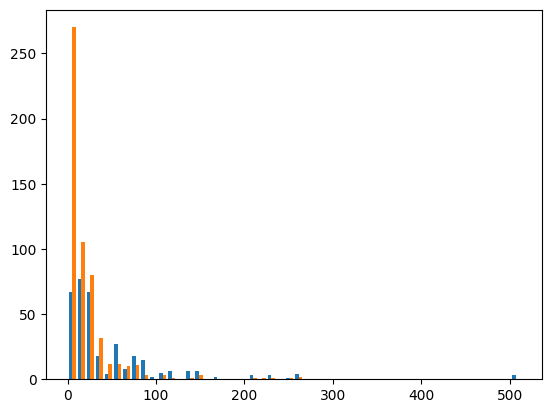

In [65]:
plt.hist((g3,g4), bins=50)

In [66]:
ct= pd.crosstab(df["Survived"],df["Pclass"])
ct.shape

(2, 3)

In [67]:
stats.chi2_contingency(ct)

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))

(array([1., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([184. , 214.7, 245.4, 276.1, 306.8, 337.5, 368.2, 398.9, 429.6,
        460.3, 491. ]),
 <BarContainer object of 10 artists>)

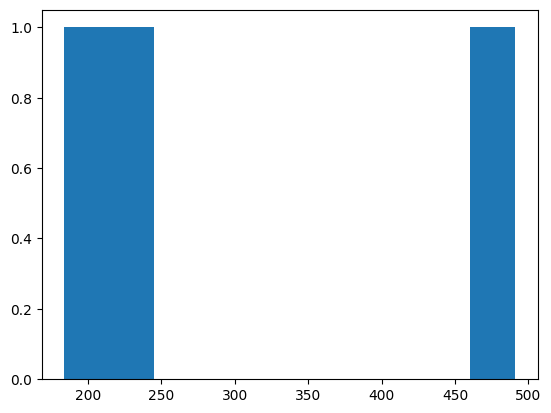

In [68]:
plt.hist(df["Pclass"].value_counts())

In [69]:
df.corr()

C:\Users\babam\AppData\Local\Temp\ipykernel_21752\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [70]:
accuracy_score(y_test,ypred)

0.823728813559322